/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2279 - loss: 1.3893 - val_accuracy: 0.3400 - val_loss: 1.3829
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2415 - loss: 1.3877 - val_accuracy: 0.4575 - val_loss: 1.3797
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2735 - loss: 1.3806 - val_accuracy: 0.4850 - val_loss: 1.3663
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3196 - loss: 1.3646 - val_accuracy: 0.5900 - val_loss: 1.3226
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3316 - loss: 1.3248 - val_accuracy: 0.5975 - val_loss: 1.2301
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3663 - loss: 1.2703 - val_accuracy: 0.5925 - val_loss: 1.1198
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4420 - loss: 1.1994 - val_accuracy: 0.5825 - val_loss: 1.0375
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4237 - loss: 1.1620 - val_accuracy: 0.5950 - 

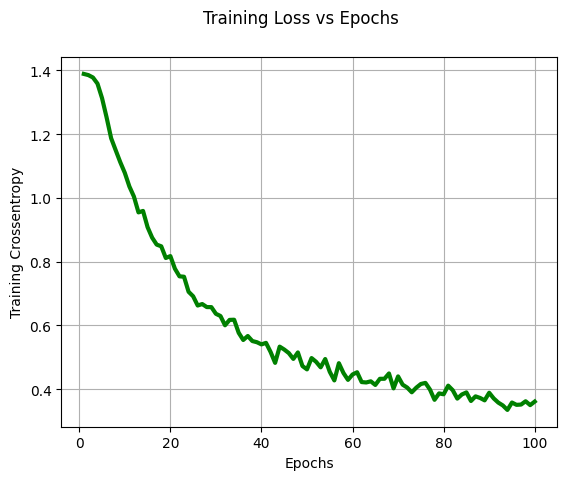

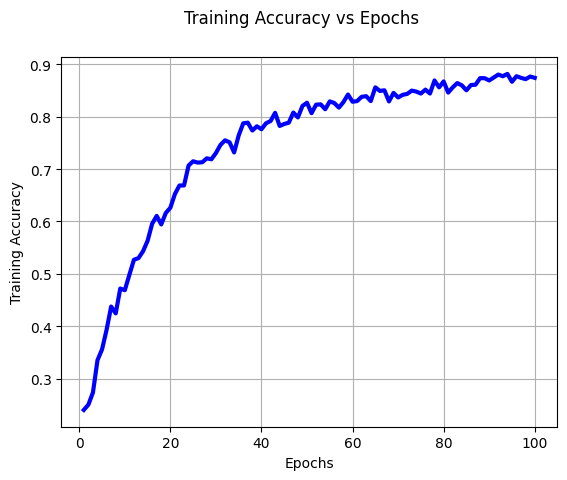

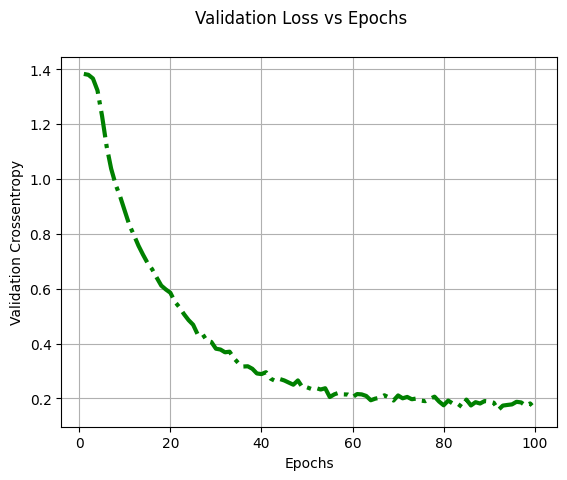

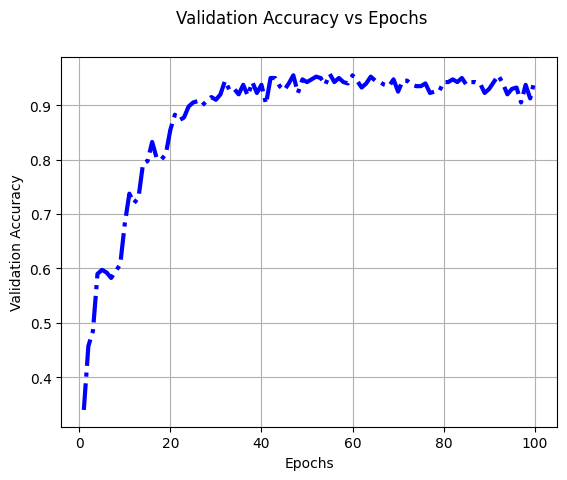

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv("mobile_prices.csv")

#Features
#id:ID
#battery_power:Total energy a battery can store in one time measured in mAh
#blue:Has bluetooth or not
#clock_speed:speed at which microprocessor executes instructions
#dual_sim:Has dual sim support or not
#fc:Front Camera mega pixels
#four_g:Has 4G or not
#int_memory:Internal Memory in Gigabytes
#m_dep:Mobile Depth in cm
#mobile_wt:Weight of mobile phone
#n_cores:Number of cores of processor
#pc:Primary Camera mega pixels
#px_height:Pixel Resolution Height
#px_width:Pixel Resolution Width
#ram:Random Access Memory in Megabytes
#sc_h:Screen Height of mobile in cm
#sc_w:Screen Width of mobile in cm
#talk_time:longest time that a single battery charge will last when you are
#three_g:Has 3G or not
#touch_screen:Has touch screen or not
#wifi:Has wifi or not

#price_range - This is the target variable with values of
#0(low cost)
#1(medium cost)
#2(high cost)
#3(very high cost).

X = df.iloc[:,:20]
y = df.iloc[:,20:21]

ss = StandardScaler()
X = ss.fit_transform(X)

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2,random_state=11)

oh = OneHotEncoder()
ytrain = oh.fit_transform(ytrain).toarray()

model = Sequential()
model.add(Dense(64,input_shape=(20,),activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(32,activation="softmax"))
model.add(Dropout(0.5))
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

ytestoh=oh.fit_transform(ytest).toarray()

history = model.fit(Xtrain,ytrain,epochs=100,batch_size=32,validation_data=(Xtest,ytestoh))

ypred = model.predict(Xtest)
ypred = np.argmax(ypred,axis=1)

score = accuracy_score(ypred,ytest)
print(accuracy_score(ytest,ypred))

cmat = confusion_matrix(ytest, ypred)
print('Confusion matrix of Neural Network is \n',cmat,'\n')

plt.figure(1);
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'],'g-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Training Loss vs Epochs')
plt.show()

plt.figure(2);
plt.plot(range(1, len(history.history['loss']) + 1), history.history['accuracy'],'b-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.grid(1,which='both')
plt.suptitle('Training Accuracy vs Epochs')
plt.show()

plt.figure(3);
plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_loss'],'g-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Validation Loss vs Epochs')
plt.show()

plt.figure(4);
plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_accuracy'],'b-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(1,which='both')
plt.suptitle('Validation Accuracy vs Epochs')
plt.show()